In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install necessary libraries
!pip install mat73

import mat73
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam



In [ ]:
train_dataset_path = '//content/drive/MyDrive/SVHN dataset/test_32x32.mat'
test_dataset_path = '//content/drive/MyDrive/SVHN dataset/train_32x32.mat'


In [ ]:
def load_data(path):
    """Helper function for loading a MAT-File"""
    data = loadmat(path)  # Since the original dataset isn't using mat73 but loadmat
    return data['X'], data['y']


In [ ]:
X_train, y_train = load_data(train_dataset_path)
X_test, y_test = load_data(test_dataset_path)


In [ ]:
print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)


Training Set (32, 32, 3, 26032) (26032, 1)
Test Set (32, 32, 3, 73257) (73257, 1)


In [ ]:
X_train = np.transpose(X_train, (3, 0, 1, 2))
X_test = np.transpose(X_test, (3, 0, 1, 2))


In [ ]:
print("Reshaped Training Set", X_train.shape, y_train.shape)
print("Reshaped Test Set", X_test.shape, y_test.shape)


Reshaped Training Set (26032, 32, 32, 3) (26032, 1)
Reshaped Test Set (73257, 32, 32, 3) (73257, 1)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
def build_model():
    model = Sequential()

    # First convolution layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolution layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolution layer
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer (10 digits, softmax activation for classification)
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
model = build_model()
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - accuracy: 0.2719 - loss: 2.0506 - val_accuracy: 0.7284 - val_loss: 0.9306
Epoch 2/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 38s 103ms/step - accuracy: 0.7113 - loss: 0.9340 - val_accuracy: 0.8131 - val_loss: 0.6289
Epoch 3/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.7963 - loss: 0.6836 - val_accuracy: 0.8508 - val_loss: 0.5238
Epoch 4/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 42s 105ms/step - accuracy: 0.8385 - loss: 0.5525 - val_accuracy: 0.8846 - val_loss: 0.4429
Epoch 5/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - accuracy: 0.8605 - loss: 0.4832 - val_accuracy: 0.8873 - val_loss: 0.4024
Epoch 6/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 35s 108ms/step - accuracy: 0.8787 - loss: 0.4209 - val_accuracy: 0.8978 - val_loss: 0.3877
Epoch 7/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 42s 110ms/step - accuracy: 0.8878 - loss: 0.3778 - val_accuracy: 0.9019 - val_loss: 0.3710
Epoch 8/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.8943 - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')


2290/2290 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.8665 - loss: 0.5147
Test accuracy: 86.50%


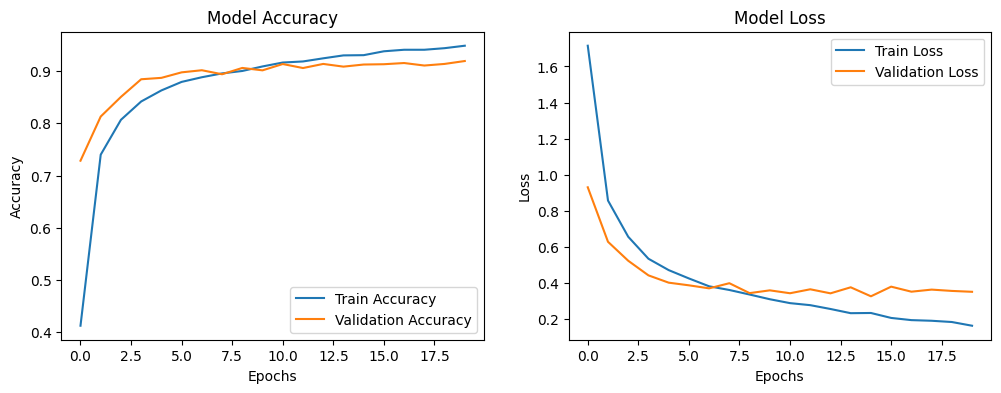

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


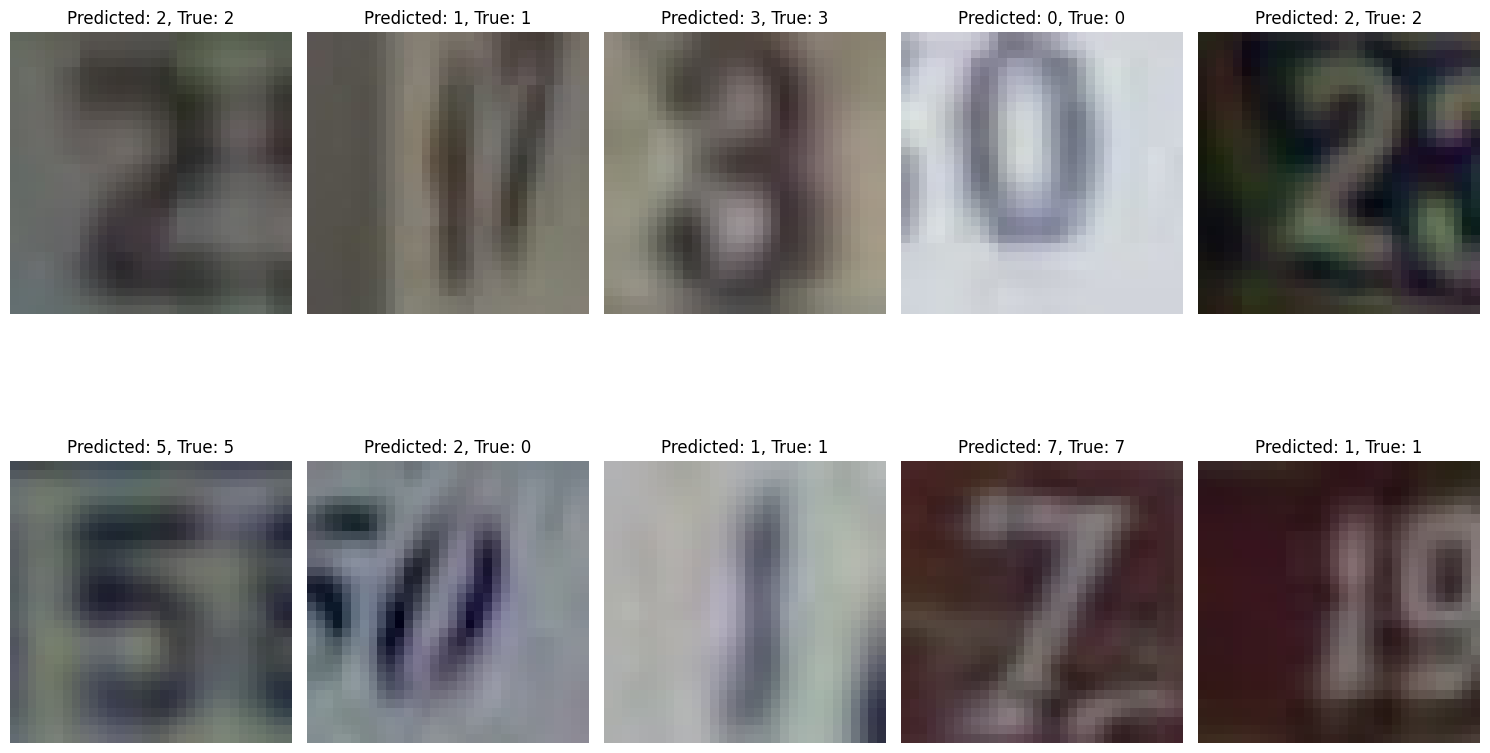

In [ ]:
pred_plot(model,X_val,y_val)